In [9]:
# EDA and Preprocessing for 5G QoS Dataset

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('replicated_device.csv', parse_dates=['Timestamp'])


In [10]:
df.columns

Index(['Timestamp', 'User_ID', 'Application_Type', 'Signal_Strength',
       'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth',
       'Resource_Allocation', 'device_type'],
      dtype='object')

In [19]:

#  Convert & Sort by Timestamp

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_sorted = df.sort_values(by='Timestamp').reset_index(drop=True)

print("Starting timestamp:", df_sorted['Timestamp'].iloc[0])
print("Ending timestamp:", df_sorted['Timestamp'].iloc[-1])
print("\nAll sorted timestamps:")
print(df_sorted['Timestamp'].to_string(index=False))


Starting timestamp: 2025-03-16 09:01:00
Ending timestamp: 2025-04-14 19:55:00

All sorted timestamps:
2025-03-16 09:01:00
2025-03-16 09:03:00
2025-03-16 09:05:00
2025-03-16 09:05:00
2025-03-16 09:05:00
2025-03-16 09:08:00
2025-03-16 09:09:00
2025-03-16 09:12:00
2025-03-16 09:15:00
2025-03-16 09:16:00
2025-03-16 09:18:00
2025-03-16 09:19:00
2025-03-16 09:22:00
2025-03-16 09:24:00
2025-03-16 09:29:00
2025-03-16 09:29:00
2025-03-16 09:31:00
2025-03-16 09:32:00
2025-03-16 09:33:00
2025-03-16 09:34:00
2025-03-16 09:35:00
2025-03-16 09:35:00
2025-03-16 09:36:00
2025-03-16 09:36:00
2025-03-16 09:38:00
2025-03-16 09:38:00
2025-03-16 09:39:00
2025-03-16 09:43:00
2025-03-16 09:43:00
2025-03-16 09:44:00
2025-03-16 09:45:00
2025-03-16 09:47:00
2025-03-16 09:48:00
2025-03-16 09:48:00
2025-03-16 09:48:00
2025-03-16 09:54:00
2025-03-16 09:55:00
2025-03-16 09:55:00
2025-03-16 09:56:00
2025-03-16 09:56:00
2025-03-16 09:58:00
2025-03-16 10:00:00
2025-03-16 10:01:00
2025-03-16 10:06:00
2025-03-16 10:08:0

In [20]:
# # Extract day of the week (Monday=0, Sunday=6)
# df['Day_of_week'] = df['Timestamp'].dt.dayofweek

# # Create a column to classify weekday or weekend
# df['Day_Type'] = df['Day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# # Check the updated DataFrame
# print(df[['Timestamp', 'Day_of_week', 'Day_Type']].head(10))

            Timestamp  Day_of_week Day_Type
0 2025-03-16 09:01:00            6  Weekend
1 2025-03-16 09:03:00            6  Weekend
2 2025-03-16 09:05:00            6  Weekend
3 2025-03-16 09:05:00            6  Weekend
4 2025-03-16 09:05:00            6  Weekend
5 2025-03-16 09:08:00            6  Weekend
6 2025-03-16 09:09:00            6  Weekend
7 2025-03-16 09:12:00            6  Weekend
8 2025-03-16 09:15:00            6  Weekend
9 2025-03-16 09:16:00            6  Weekend


Day_Type
Weekday    8400
Weekend    3600
Name: count, dtype: int64


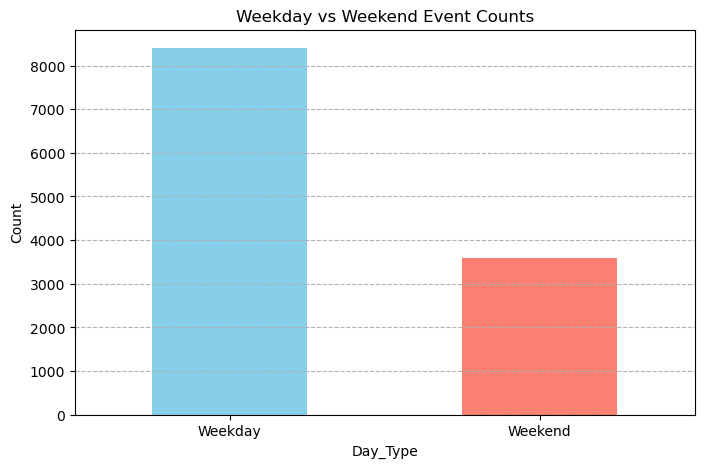

In [21]:
print(df['Day_Type'].value_counts())


import matplotlib.pyplot as plt

df['Day_Type'].value_counts().plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Weekday vs Weekend Event Counts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


In [11]:
# Check device type distribution grouped by Application Type
device_application_mapping = pd.crosstab(df['Application_Type'], df['device_type'])

print(device_application_mapping)

device_type        Home_mobile   PC    TV  office_mobile
Application_Type                                        
Emergency_Service            0    0     0           1410
File_Download             1440    0     0              0
IoT_Temperature            390    0     0              0
Online_Gaming                0  653   697              0
Streaming                 1460    0  1360              0
Video_Call                   0    0     0           1740
VoIP_Call                 1410    0     0              0
Web_Browsing              1440    0     0              0


In [13]:

# Display basic info
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            12000 non-null  datetime64[ns]
 1   User_ID              12000 non-null  object        
 2   Application_Type     12000 non-null  object        
 3   Signal_Strength      12000 non-null  object        
 4   Latency              12000 non-null  object        
 5   Required_Bandwidth   12000 non-null  object        
 6   Allocated_Bandwidth  12000 non-null  object        
 7   Resource_Allocation  12000 non-null  object        
 8   device_type          12000 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 843.9+ KB
None


In [14]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
device_type            0
dtype: int64


In [15]:

# Show unique values for each column
print("\nUnique values per column:")
for column in df.columns:
    unique_values = df[column].nunique()
    sample_values = df[column].unique()[:10]  # Display up to first 10 unique values
    print(f"{column}: {unique_values} unique values, Sample: {sample_values}")



Unique values per column:
Timestamp: 8945 unique values, Sample: <DatetimeArray>
['2025-03-16 09:01:00', '2025-03-16 09:03:00', '2025-03-16 09:05:00',
 '2025-03-16 09:08:00', '2025-03-16 09:09:00', '2025-03-16 09:12:00',
 '2025-03-16 09:15:00', '2025-03-16 09:16:00', '2025-03-16 09:18:00',
 '2025-03-16 09:19:00']
Length: 10, dtype: datetime64[ns]
User_ID: 1 unique values, Sample: ['user1']
Application_Type: 8 unique values, Sample: ['Video_Call' 'VoIP_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'File_Download' 'Web_Browsing' 'IoT_Temperature']
Signal_Strength: 84 unique values, Sample: ['-75 dBm' '-80 dBm' '-85 dBm' '-70 dBm' '-78 dBm' '-90 dBm' '-88 dBm'
 '-95 dBm' '-82 dBm' '-76 dBm']
Latency: 87 unique values, Sample: ['30 ms' '20 ms' '40 ms' '10 ms' '25 ms' '50 ms' '100 ms' '35 ms' '45 ms'
 '32 ms']
Required_Bandwidth: 188 unique values, Sample: ['10 Mbps' '100 Kbps' '5 Mbps' '1 Mbps' '2 Mbps' '500 Kbps' '10 Kbps'
 '3 Mbps' '12 Mbps' '2.5 Mbps']
Allocated_Bandwidth: 194

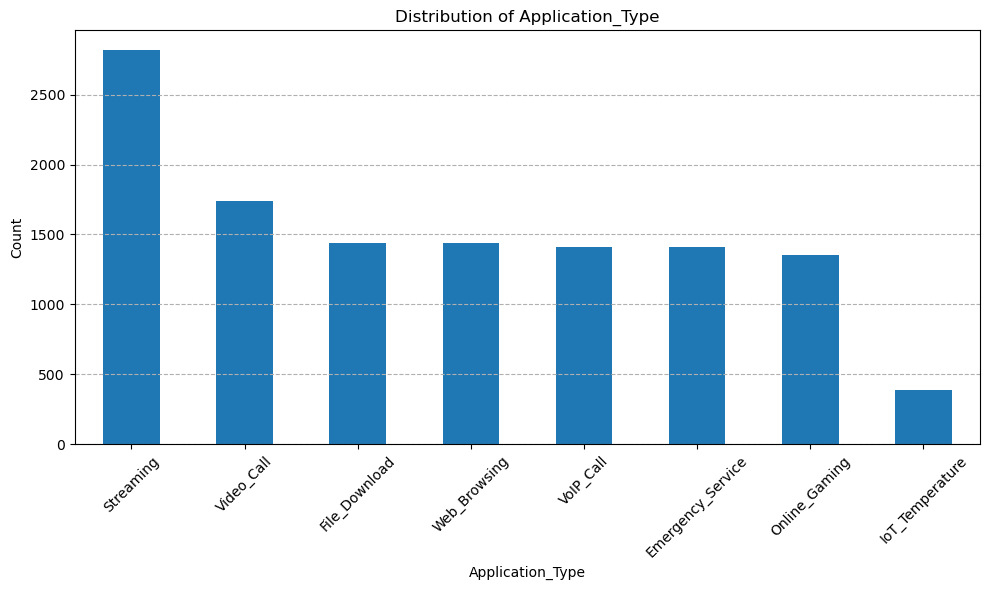

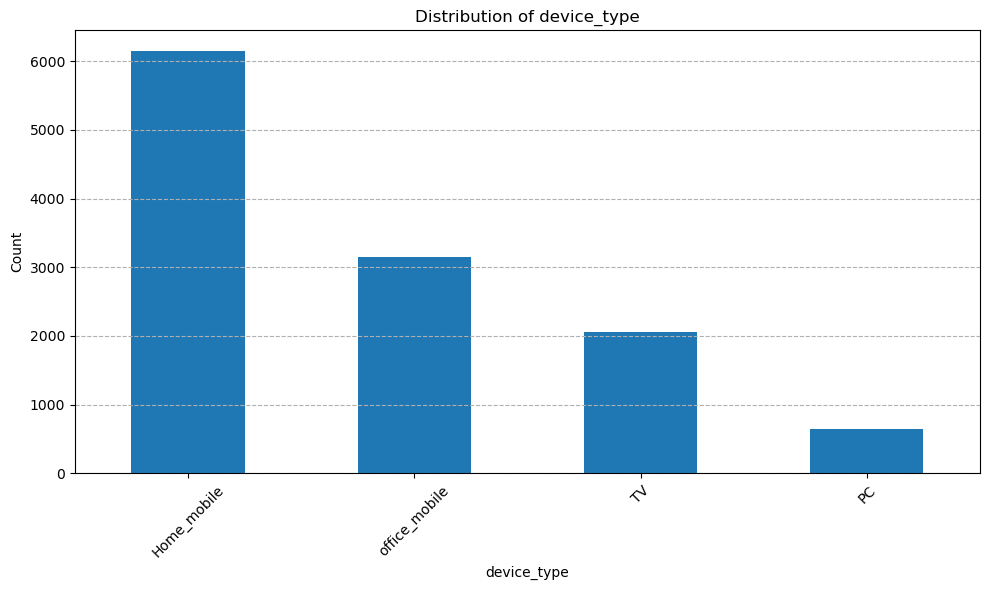

In [16]:

# Plot distributions for categorical variables
categorical_columns = ['Application_Type', 'device_type']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
